# Synthetic experiment
This notebook reproduces the *synthetic experiments* described in Section 5 of the paper titled "On the convergence of ADAM and beyond" (Reddi, Kale and Kumar 2018).

## Imports

The following modules are necessary to run this notebook:

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

## Projection operation

Below is the implementation of the project operation $\Pi_{\mathcal{F},A}(y)$, defined as:

$\Pi_{\mathcal{F},A}(y) = argmin_{x \in \mathcal{F}} \mid A^{1/2}(x - y)\mid$

in a univariuate setup.

In [2]:
def project(F, A, y):
    if F is not None:
        F = np.array(F)
        norms = np.abs((F - y).dot(math.sqrt(A)))
        return F[np.argmin(norms)]
    else:
        return y

## ADAM

We implement the ADAM algorithm. Since this experiment is done in an univariate setup, this implementation only works for such setups (i.e. only one parameter to update).

In [3]:
class Adam:

    def __init__(self, step_size=0.001, beta1=0.9, beta2=0.99, x_range=None):
        self.step_size = step_size
        self.beta1 = beta1
        self.beta2 = beta2
        self.x_range = x_range
        self.mt = 0
        self.vt = 0

    def update(self, x, grad):
        self.mt = self.beta1 * self.mt + (1 - self.beta1) * grad
        self.vt = self.beta2 * self.vt + (1 - self.beta2) * grad**2
        update = self.step_size * self.mt / math.sqrt(self.vt)
        return project(self.x_range, math.sqrt(self.vt), x - update)

## AMSgrad

We then implement AMSgrad, again for a univariate setup.
The pseudocode is provided in the Algorithm 2 of the paper.

In [4]:
class AMSgrad:

    def __init__(self, step_size=0.001, beta1=0.9, beta2=0.99, x_range=None):
        self.step_size = step_size
        self.beta1 = beta1
        self.beta2 = beta2
        self.x_range = x_range
        self.mt = 0
        self.vt = 0

    def update(self, x, grad):
        self.mt = self.beta1 * self.mt + (1 - self.beta1) * grad
        self.vt = max(self.vt, self.beta2 * self.vt + (1 - self.beta2) * grad**2)
        update = self.step_size * self.mt / math.sqrt(self.vt)
        return project(self.x_range, math.sqrt(self.vt), x + update)

## Gradient

In [5]:
def computeGradient(t, online=True):
    if online:
        # Online
        return 1010 if t + 1 % 101 == 0 else -10
    else:
        # Stochastic
        return 1010 if random.randint(1,101) == 100 else -10

## Experiment

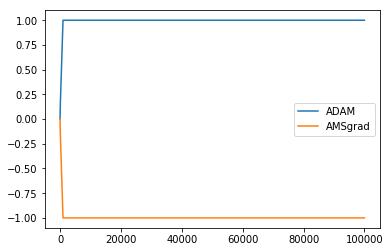

In [10]:
T = 100000

iterations = np.arange(0, T, 1)
x_range = np.arange(-1, 1.001, 0.001)
x_adam, x_amsg = 0, 0
xt_adam, xt_amsg = [], []

adam = Adam(x_range=x_range)
amsg = AMSgrad(x_range=x_range)

for t in iterations:    
    grad = computeGradient(t)
    x_adam = adam.update(x_adam, grad)
    x_amsg = amsg.update(x_amsg, grad)

    xt_adam.append(x_adam)
    xt_amsg.append(x_amsg)

plt.plot(iterations, xt_adam, label='ADAM')
plt.plot(iterations, xt_amsg, label='AMSgrad')
plt.legend()
plt.show()